In [16]:
from numpy.random import normal
from matplotlib import pyplot

In [17]:
#define the distribution
mu=50
sigma=5

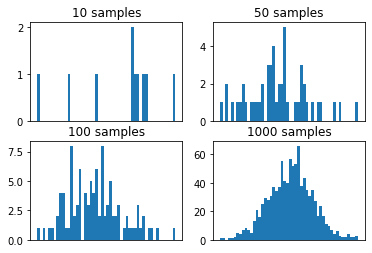

In [18]:
#generate monte carlo samples of differing size
sizes = [10,50,100,1000]
for i in range(len(sizes)):
    #generate sample
    sample = normal(mu,sigma,sizes[i])
    #plot histogram of sample
    pyplot.subplot(2,2,i+1)
    pyplot.hist(sample,bins=50)
    pyplot.title('%d samples'%sizes[i])
    pyplot.xticks([])
#show the plot
pyplot.show()


In [4]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [95]:
data = pd.DataFrame()
data = wb.DataReader('PG', data_source='yahoo', start='2010-1-1')
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,61.529999,60.560001,61.520000,60.630001,5942200.0,41.901691
2010-01-04,61.310001,60.630001,61.110001,61.119999,9190800.0,42.240326
2010-01-05,61.279999,60.599998,61.130001,61.139999,8649400.0,42.254150
2010-01-06,60.959999,60.500000,60.939999,60.849998,9908400.0,42.053738
2010-01-07,60.700001,60.240002,60.580002,60.520000,8972800.0,41.825661


In [96]:
new_data= data['Close']
new_data.head()

Date
2009-12-31    60.630001
2010-01-04    61.119999
2010-01-05    61.139999
2010-01-06    60.849998
2010-01-07    60.520000
Name: Close, dtype: float64

In [97]:
log_returns = np.log(1+new_data.pct_change())

In [98]:
log_returns.tail()

Date
2022-02-01   -0.004435
2022-02-02    0.017746
2022-02-03    0.009426
2022-02-04   -0.016029
2022-02-07   -0.007519
Name: Close, dtype: float64

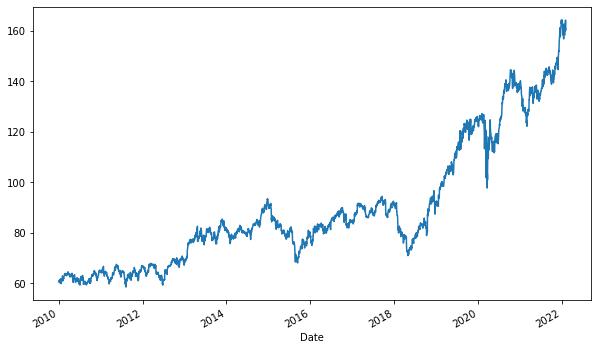

In [99]:
new_data.plot(figsize=(10, 6));

<AxesSubplot:xlabel='Date'>

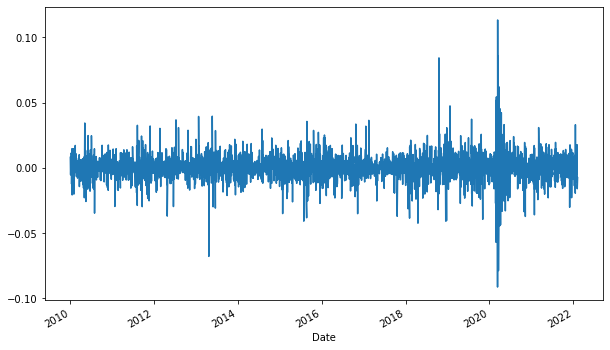

In [100]:
log_returns.plot(figsize=(10, 6))

In [101]:
u = log_returns.mean()
u

0.00031923244447830564

In [102]:
var = log_returns.var()
var

0.00011555471061182909

In [103]:
drift = u-(0.5*var)
drift

0.0002614550891723911

In [104]:
stdev = log_returns.std()
stdev

0.010749637696770486

In [105]:
type(drift)

float

In [106]:
np.array(drift)

array(0.00026146)

In [107]:
type(stdev)

float

In [108]:
np.array(stdev)

array(0.01074964)

In [109]:
norm.ppf(0.95)

1.6448536269514722

In [110]:
x = np.random.rand(10, 2)
x

array([[0.99853026, 0.88404672],
       [0.1160843 , 0.14644289],
       [0.08111173, 0.33161111],
       [0.02783265, 0.51940272],
       [0.74522687, 0.02553266],
       [0.24986418, 0.81062757],
       [0.5558932 , 0.15024437],
       [0.8887874 , 0.42782461],
       [0.7558058 , 0.42477935],
       [0.24866095, 0.01379709]])

In [111]:
norm.ppf(x)

array([[ 2.97399698,  1.19546203],
       [-1.19479124, -1.05181205],
       [-1.39763251, -0.43546875],
       [-1.91364678,  0.04865461],
       [ 0.65954436, -1.9509305 ],
       [-0.67491722,  0.88021128],
       [ 0.140565  , -1.03538587],
       [ 1.22010467, -0.18191528],
       [ 0.69287437, -0.18968151],
       [-0.67870956, -2.20300796]])

In [112]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 2.3414453 , -0.83476712],
       [ 1.78330989,  0.00474148],
       [-1.09594981, -0.91692401],
       [ 0.11671208, -0.20754782],
       [ 0.22880473,  0.15974142],
       [ 0.88304185,  0.90845729],
       [ 1.71419576,  1.58467164],
       [-2.33226859,  0.63284792],
       [ 0.36043661, -1.60050176],
       [-0.52318543, -1.20184394]])

In [113]:
t_intervals = 1000
iterations = 20

In [114]:
daily_returns = np.exp(np.array(drift) + np.array(stdev) * norm.ppf(np.random.rand(t_intervals, iterations)))

In [115]:
daily_returns

array([[0.98099269, 1.00139093, 0.995486  , ..., 0.98660242, 1.00876511,
        1.01733195],
       [0.97955924, 1.01652436, 1.01237751, ..., 0.98595242, 1.00071967,
        0.99763055],
       [1.00455668, 0.97300244, 0.97890543, ..., 1.00681679, 0.99751011,
        1.00435222],
       ...,
       [0.99912876, 0.99654943, 0.99420393, ..., 1.00385778, 0.99817461,
        0.99620802],
       [0.99379816, 0.99249144, 1.01420779, ..., 0.99450674, 0.99262277,
        1.00109945],
       [0.98421631, 0.99480891, 0.98261361, ..., 0.98908904, 1.01211795,
        1.00826349]])

In [116]:
S0 = new_data.iloc[-1]
S0

160.32000732421875

In [117]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [118]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [119]:
price_list[0] = S0
price_list

array([[160.32000732, 160.32000732, 160.32000732, ..., 160.32000732,
        160.32000732, 160.32000732],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [120]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [121]:
price_list

array([[160.32000732, 160.32000732, 160.32000732, ..., 160.32000732,
        160.32000732, 160.32000732],
       [157.04294492, 162.96919306, 162.30436912, ..., 158.06789913,
        160.4353856 , 159.94013719],
       [157.75854004, 158.56942289, 158.88062892, ..., 159.14541403,
        160.03591981, 160.63623265],
       ...,
       [355.58210982, 230.61360087, 205.1838835 , ..., 234.41017242,
        237.22134244, 251.26954525],
       [353.37684482, 228.88202457, 208.09909253, ..., 233.12249663,
        235.47130716, 251.54580332],
       [347.79925421, 227.69387756, 204.48099995, ..., 230.57890743,
        238.32473671, 253.62444967]])

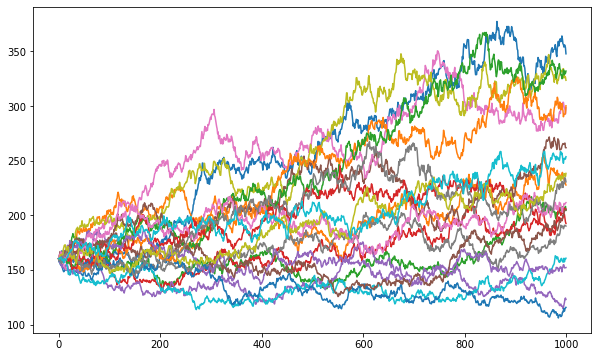

In [122]:
plt.figure(figsize=(10,6))
plt.plot(price_list)

In [123]:
np.mean(price_list)

194.6272176553513

In [124]:
print("Expected price: ", round(np.mean(price_list),2))
print("Quantile (5%): ",np.percentile(price_list,5))
print("Quantile (95%): ",np.percentile(price_list,95))

Expected price:  194.63
Quantile (5%):  129.09772777367849
Quantile (95%):  310.135496307186
